# A simple parser for LTspice files

**Scott Prahl**

May 2022

This notebook treats files with op-amps LTspice files back to a simple netlist.

In [1]:
import ltparser
from lcapy import Circuit

%config InlineBackend.figure_format='retina'

W 1 2; right
W 3 4; right
W 5 6; right
W 1 7; down
W 8 7; right
W 7 9; right
W 4 10; down
W 11 10; right
W 10 12; right
W 13 14; right
W 5 15; down
W 13 16; down
W 17 0_2; down
W 18 0_1; down
R1 6 8 1000.0; right
R2 2 3 5000.0; right
R3 16 18 833.0; down
Vin 15 17 {Vin}; down
E1 11 0_1 opamp 9 14
P1 12 0; down, v=Vout



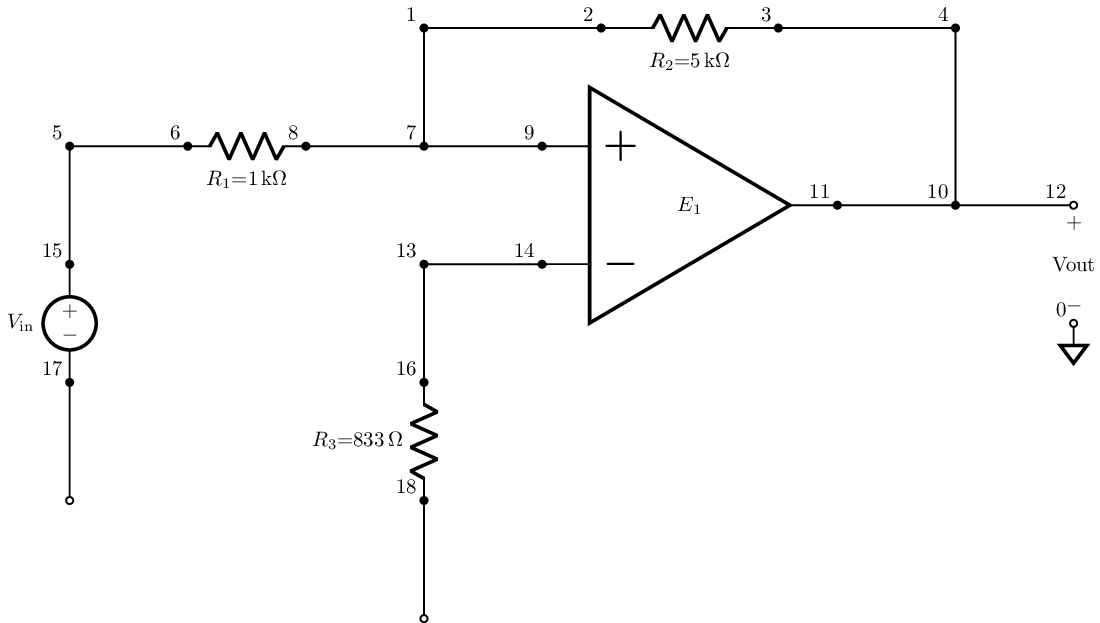

In [2]:
lt = ltparser.LTspice()
lt.read("../tests/examples/inverting_opamp_simple.asc")
lt.make_netlist()
print(lt.netlist)

# Should work now!
cct = lt.circuit()
cct.draw(scale=0.5, cmt_size=1)

In [3]:
lt = ltparser.LTspice()
lt.read("../tests/examples/inverting_opamp_simple.asc")
lt.make_netlist(minimal=True)
print(lt.netlist)

R1 1 2 1000.0
R2 2 3 5000.0
R3 4 0_1 833.0
Vin 1 0_2 {Vin}
E1 3 0_1 opamp 2 4
P1 3 0; v=Vout



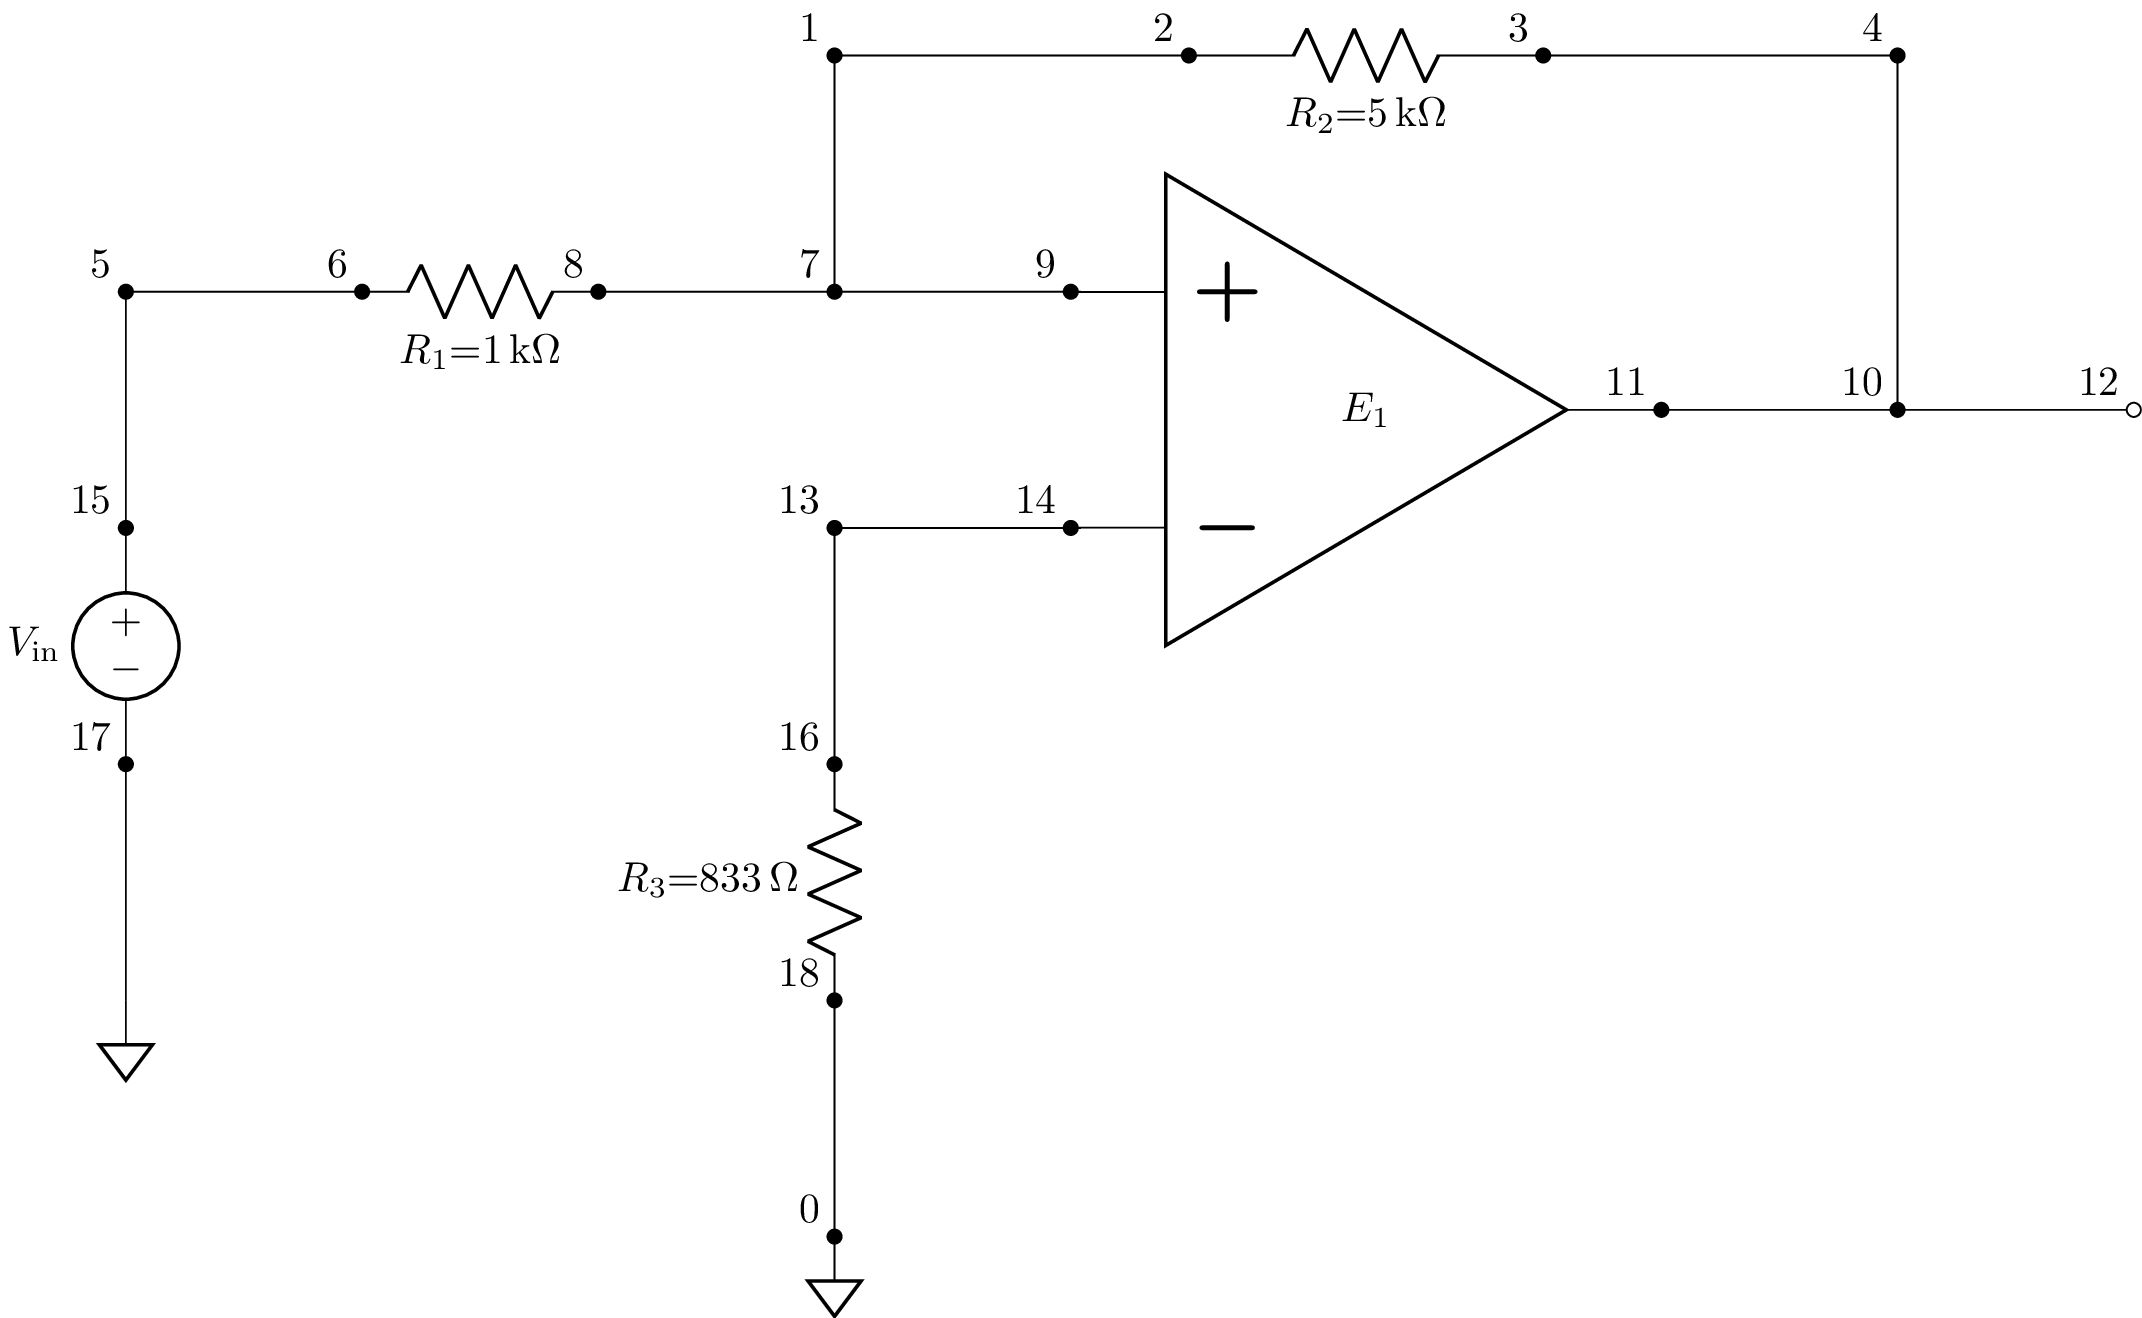

In [4]:
cct = Circuit(
    """W 1 2; right
W 3 4; right
W 5 6; right
W 1 7; down
W 8 7; right
W 7 9; right
W 4 10; down
W 11 10; right
W 10 12; right
W 13 14; right
W 5 15; down
W 13 16; down
W 17 0; down
W 18 0; down
R1 6 8 1000.0; right
R2 2 3 5000.0; right
R3 16 18 833.0; down
Vin 15 17 {Vin}; down
E1 11 0 opamp 9 14
;autoground=true"""
)
cct.draw()

R1 3 1 1000.0
R2 1 2 5000.0
R3 4 0_1 833.0
Vin 3 0_2 {Vin}
E1 2 0 opamp 1 4
P1 2 0; v=Vout



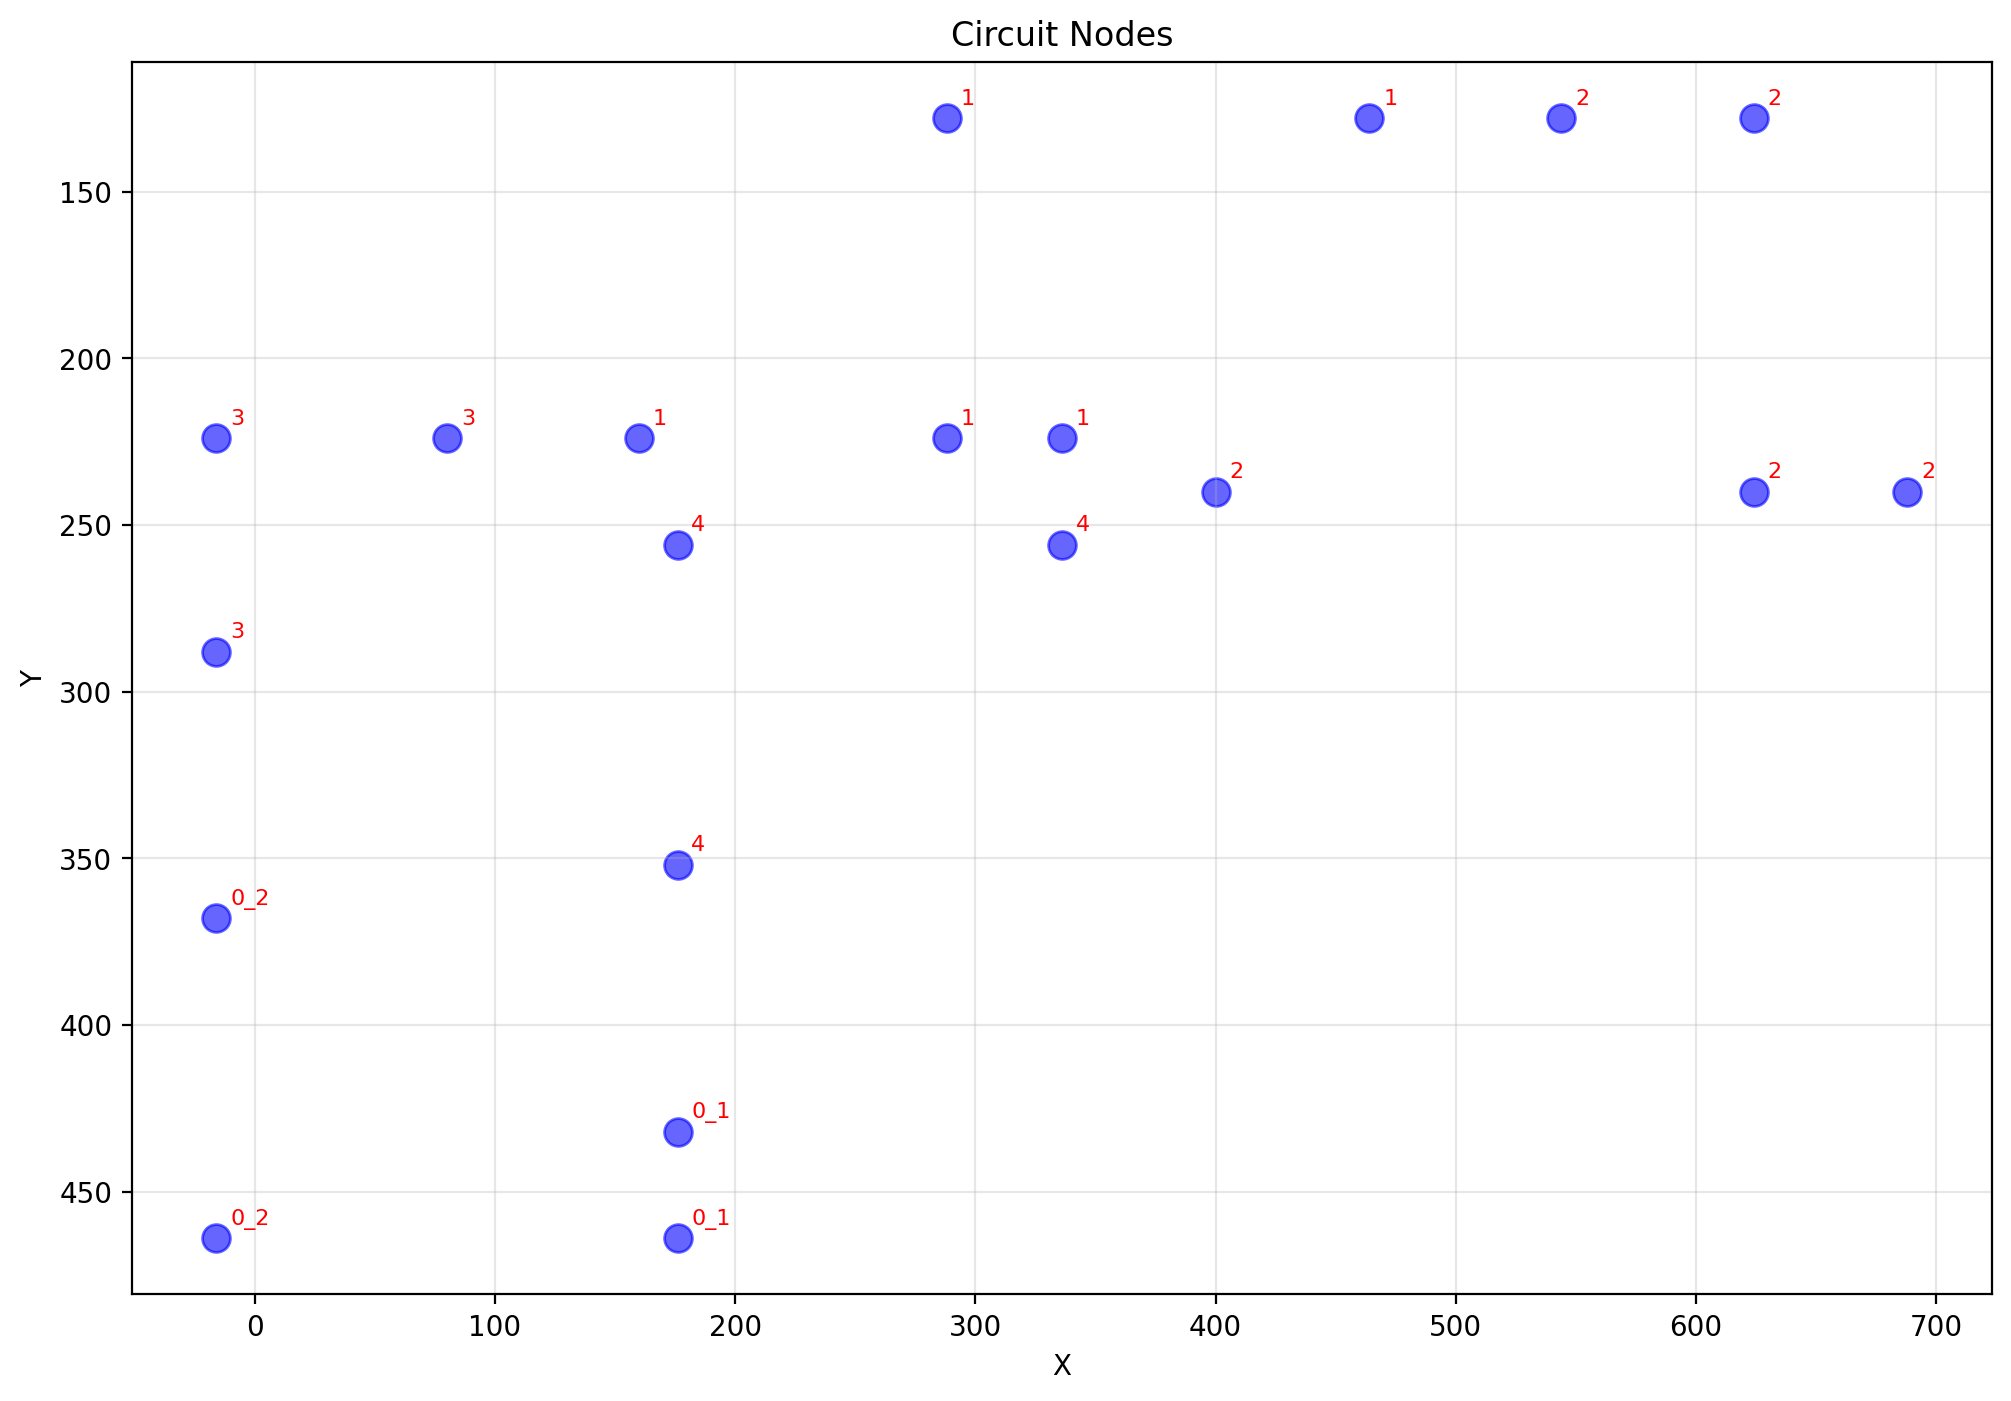

In [7]:
lt = ltparser.LTspice()
lt.read("../tests/examples/inverting_opamp_simple.asc")
lt.make_netlist(minimal=True, renumber_nodes=False)
print(lt.netlist)
lt.plot_nodes()